# Heart Disease Project - Machine Learning Model

In this notebook, I will create a Machine Learning model to predict whether or not a patient has heart disease, given a set of information about them. This project uses the following Heart Disease dataset from Kaggle: 
https://www.kaggle.com/ronitf/heart-disease-uci.

# Step 1 - Import libraries & load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.set_palette('Accent')

%matplotlib inline

In [2]:
df = pd.read_csv('heart_clean.csv')

In [3]:
df.columns.values

array(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'], dtype=object)

# Step 2 - Define Features & Label
In defining the features I'll use to predict whether or not a patient has heart disease, I will use the following features, based on the findings from my EDA:

* Age (-0.22 correlation with label)
* Sex (-0.28 correlation with label)
* CP (0.43 correlation with label)
* Thalach (0.42 correlation with label)
* Exang (-0.44 correlation with label)
* Oldpeak (-0.43 correlation with label)
* Slope (0.34 correlation with label)
* CA (-0.41 correlation with label)
* Thal (-0.34 correlation with label)

I decided to only use features that had a positive or negative correlation of 0.2 or higher with the label.

In [4]:
features = df[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']]

In [5]:
label = df[['target']]

# Step 3 - Split training, testing, and validation sets

In [6]:
# split into initial train & test
x_train, x_test, y_train, y_test = train_test_split(features, label, train_size = 0.8, 
                                                    test_size = 0.2, random_state=1)

In [7]:
# split further into train & validate (test withheld until very end)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, 
                                                    test_size = 0.2, random_state=1)

# Step 4 - Create and train a model for binary classification
In this next step, I will create and train a Random Forest classifier. I believe that several different types of classification models could work on this dataset, but I personally want to practice Random Forests. I also particularly enjoy Random Forests because I find them easy to conceptualize, compared to other classifiers.

In [8]:
# create the model
classifier = RandomForestClassifier(n_estimators = 50, random_state = 1)

In [9]:
# train the model
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

# Step 5 - Predict validation labels & measure model accuracy

In [10]:
y_predict_val = classifier.predict(x_val)

In [11]:
val_accuracy = accuracy_score(y_val, y_predict_val)
val_precision = precision_score(y_val, y_predict_val)
val_recall = recall_score(y_val, y_predict_val)
val_f1 = f1_score(y_val, y_predict_val)

print(f"Accuracy on Validation Set: {val_accuracy}")
print(f"Precision on Validation Set: {val_precision}")
print(f"Recall on Validation Set: {val_recall}")
print(f"F1 Score on Validation Set: {val_f1}")

Accuracy on Validation Set: 0.8367346938775511
Precision on Validation Set: 0.9090909090909091
Recall on Validation Set: 0.8571428571428571
F1 Score on Validation Set: 0.8823529411764706


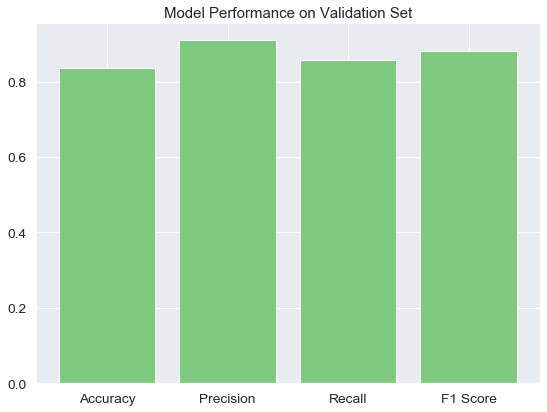

In [12]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
measurements = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
stats = [val_accuracy, val_precision, val_recall, val_f1]
ax.bar(measurements,stats)
plt.title('Model Performance on Validation Set')
plt.show()

# Step 6 - Adjust hyperparameters

This part is difficult to show in code, so I am going to write about it instead. Initially after building my model, these were my scores on the validation set:

* Accuracy: 0.8367346938775511
* Precision: 0.9090909090909091
* Recall: 0.8571428571428571
* F1 Score: 0.8823529411764706

I decided to change a few hyperparameters in hopes of achieving a higher performance in my model. Here are the adjustments I tried: 

1. **n_estimators**: This is the number of "trees" in my random forest. I started with 100, so I wanted to see if adjusting down would make a difference. I tried my model with n_estimators set to 50, and my model performed exactly the same. So I tried with even fewer, 20 this time. My model performance did go down (79% accuracy), so I tried higher numbers. With 1000 estimators, my model accuracy was the same as with 50 or 100 estimators, so I eventually settled on 50. This seemed like the smallest number of trees needed to get the best performance.
2. **One hot encoding 'CP' (Chest pain type)**: This is an adjustment I had to make to my previous notebook, heart_disease_eda (https://github.com/emilydwilliams/heart_disease/blob/master/heart_disease_eda.ipynb). This actually *decreased* my performance on all measures, so I changed the dataframe back to its previous (**not** one-hot encoded) state.
3. **Including less informative features**: Finally, I decided to try using *all* of the columns (besides 'target') from the dataset as features in the model. Interestingly, my accuracy stayed exactly the same *but* my precision increased, recall decreased, and f1 score decreased. I decided to go back to my original subset of features.

After adjusting my hyperparameters, I wasn't able to improve the performance of my model. I was, however, able to make my model worse. I feel reasonably confident now that the hyperparameters I have set are the optimal hyperparameters for my model.

# Step 7 - FINALLY assess performance on test set
In this final step, I will assess the model's performance on the previously withheld test set. This will give the most accurate idea of how the model will perform on truly never-before-seen data, since the model was *not* trained on this set and hyperparameters were *not* adjusted for this set of examples.

In [13]:
y_predict_test = classifier.predict(x_test)

In [14]:
test_accuracy = accuracy_score(y_test, y_predict_test)
test_precision = precision_score(y_test, y_predict_test)
test_recall = recall_score(y_test, y_predict_test)
test_f1 = f1_score(y_test, y_predict_test)

print(f"Accuracy on Test Set: {test_accuracy}")
print(f"Precision on Test Set: {test_precision}")
print(f"Recall on Test Set: {test_recall}")
print(f"F1 Score on Test Set: {test_f1}")

Accuracy on Test Set: 0.8032786885245902
Precision on Test Set: 0.7777777777777778
Recall on Test Set: 0.875
F1 Score on Test Set: 0.823529411764706


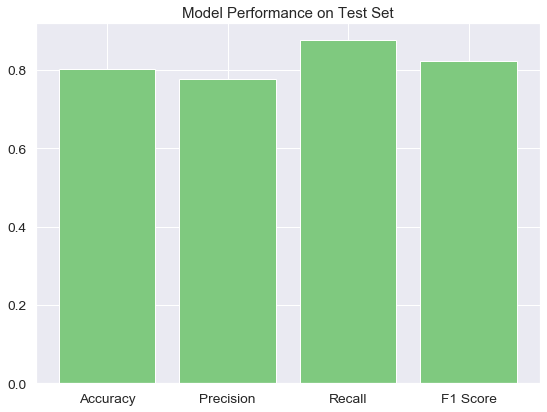

In [15]:
test_fig = plt.figure(figsize=(7,5))
test_ax = test_fig.add_axes([0,0,1,1])
test_measurements = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
test_stats = [test_accuracy, test_precision, test_recall, test_f1]
test_ax.bar(test_measurements,test_stats)
plt.title('Model Performance on Test Set')
plt.show()

# In conclusion...

My model performed better on my validation set in 3 out of 4 metrics, which is not unusual. My test set still performed fairly well (80% accuracy). A machine learning model that can predict with 80% accuracy whether or not a patient has heart disease given this set of data could potential be useful in the real world.